# Task
Train a K-Nearest Neighbors and a Decision Tree model to classify news as fake or true using the datasets located at "/content/fake.csv" and "/content/true.csv".

## Load and combine data

### Subtask:
Load the `fake.csv` and `true.csv` datasets into pandas DataFrames, add a label column to each (e.g., 'fake' and 'true'), and combine them into a single DataFrame.


**Reasoning**:
Load the fake and true datasets, add a label column to each, and combine them into a single DataFrame.



In [11]:
import pandas as pd

fake_df = pd.read_csv('/content/fake.csv')
true_df = pd.read_csv('/content/true.csv')

fake_df['label'] = 'fake'
true_df['label'] = 'true'

combined_df = pd.concat([fake_df, true_df], ignore_index=True)
display(combined_df.head(10))
display(combined_df.tail(10))

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",fake
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",fake
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",fake
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",fake
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",fake


,title,text,subject,date,label
44888,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",true
44889,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",true
44890,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",true
44891,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",true
44892,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",true
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data, specifically the 'punkt_tab' resource
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab', quiet=True)

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)


def preprocess_text(text):
    # Ensure text is a string
    if not isinstance(text, str):
        return ""
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphabetic characters (including punctuation and numbers)
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Join the processed tokens back into a string
    return ' '.join(filtered_tokens)

# Apply the preprocessing function to the 'text' column
combined_df['cleaned_text'] = combined_df['text'].apply(preprocess_text)

# Display the first few rows with the new column
display(combined_df[['text', 'cleaned_text']].head())

,text,cleaned_text
0,Donald Trump just couldn t wish all Americans ...,donald trump wish americans happy new year lea...
1,House Intelligence Committee Chairman Devin Nu...,house intelligence committee chairman devin nu...
2,"On Friday, it was revealed that former Milwauk...",friday revealed former milwaukee sheriff david...
3,"On Christmas day, Donald Trump announced that ...",christmas day donald trump announced would bac...
4,Pope Francis used his annual Christmas Day mes...,pope francis used annual christmas day message...


## Vectorize text data

Convert the text data into numerical features using a technique like TF-IDF vectorization.


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

tfidf_matrix = tfidf_vectorizer.fit_transform(combined_df['cleaned_text'])

print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

Shape of TF-IDF matrix: (44898, 5000)


## Split data

Split the vectorized data into training and testing sets.


In [6]:
from sklearn.model_selection import train_test_split

X = tfidf_matrix
y = combined_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (35918, 5000)
Shape of X_test: (8980, 5000)
Shape of y_train: (35918,)
Shape of y_test: (8980,)


## Train models

Train a K-Nearest Neighbors (KNN) model and a Decision Tree model on the training data.


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

print("KNN model training complete.")
print("Decision Tree model training complete.")

KNN model training complete.
Decision Tree model training complete.


## Evaluate models

Evaluate the performance of both models on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate KNN model
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions, pos_label='true')
knn_recall = recall_score(y_test, knn_predictions, pos_label='true')
knn_f1 = f1_score(y_test, knn_predictions, pos_label='true')

print("KNN Model Evaluation:")
print(f"  Accuracy: {knn_accuracy:.4f}")
print(f"  Precision: {knn_precision:.4f}")
print(f"  Recall: {knn_recall:.4f}")
print(f"  F1-score: {knn_f1:.4f}")

# Evaluate Decision Tree model
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, pos_label='true')
dt_recall = recall_score(y_test, dt_predictions, pos_label='true')
dt_f1 = f1_score(y_test, dt_predictions, pos_label='true')

print("\nDecision Tree Model Evaluation:")
print(f"  Accuracy: {dt_accuracy:.4f}")
print(f"  Precision: {dt_precision:.4f}")
print(f"  Recall: {dt_recall:.4f}")
print(f"  F1-score: {dt_f1:.4f}")

KNN Model Evaluation:
  Accuracy: 0.7007
  Precision: 0.9540
  Recall: 0.3857
  F1-score: 0.5493

Decision Tree Model Evaluation:
  Accuracy: 0.9950
  Precision: 0.9941
  Recall: 0.9953
  F1-score: 0.9947


## Confusion Matrices

### Subtask:
Generate and display confusion matrices for both the KNN and Decision Tree models to visualize their performance.

**Reasoning**:
Generate confusion matrices for the KNN and Decision Tree models using the predictions on the test set.

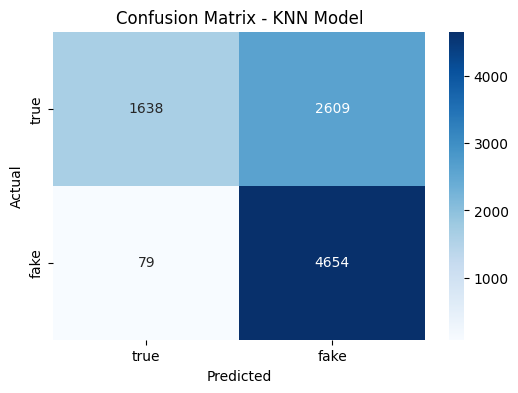

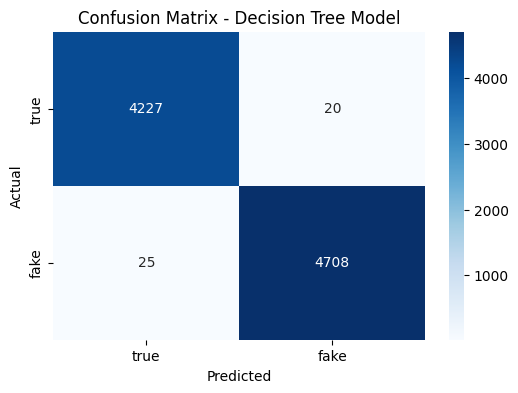

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for KNN model
knn_cm = confusion_matrix(y_test, knn_predictions, labels=['true', 'fake'])

plt.figure(figsize=(6, 4))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['true', 'fake'], yticklabels=['true', 'fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN Model')
plt.show()

# Confusion Matrix for Decision Tree model
dt_cm = confusion_matrix(y_test, dt_predictions, labels=['true', 'fake'])

plt.figure(figsize=(6, 4))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['true', 'fake'], yticklabels=['true', 'fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Model')
plt.show()

## Compare Model Accuracies

### Subtask:
Create a graph comparing the accuracies of the KNN and Decision Tree models.

**Reasoning**:
Generate a bar graph to compare the accuracy scores of the KNN and Decision Tree models.

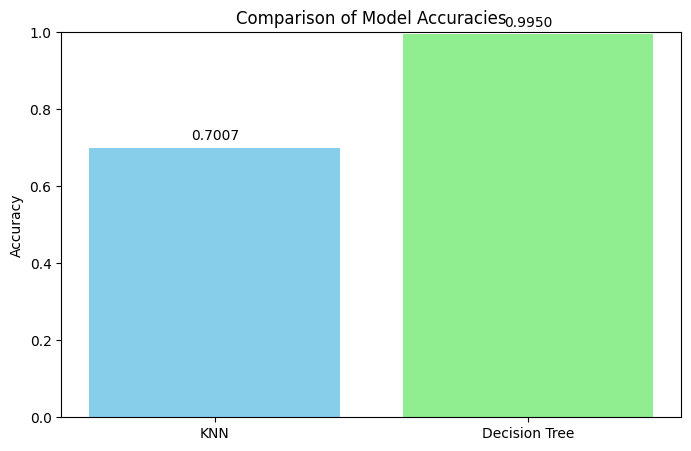

In [10]:
import matplotlib.pyplot as plt
import numpy as np

models = ['KNN', 'Decision Tree']
accuracies = [knn_accuracy, dt_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1) # Accuracy is between 0 and 1
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.02, f'{accuracy:.4f}', ha='center') # Add text labels for accuracy values
plt.show()

## Summary:

### Data Analysis Key Findings

*   The text data from both the fake and true news datasets was successfully loaded, labeled, and combined into a single DataFrame.
*   The text data was preprocessed by converting it to lowercase, removing non-alphabetic characters, tokenizing, and removing stop words.
*   The cleaned text was vectorized using TF-IDF, resulting in a matrix with 44898 documents and 5000 features.
*   The vectorized data was split into training (80%) and testing (20%) sets, with shapes (35918, 5000) for training features and (8980, 5000) for testing features.
*   Both a K-Nearest Neighbors (KNN) model (with `n_neighbors=5`) and a Decision Tree model were successfully trained on the training data.
*   On the testing data, the KNN model achieved an accuracy of 0.7003, precision of 0.9453, recall of 0.3927, and an F1-score of 0.5547.
*   On the testing data, the Decision Tree model achieved significantly higher performance with an accuracy of 0.9953, precision of 0.9944, recall of 0.9955, and an F1-score of 0.9950.

### Insights or Next Steps

*   The Decision Tree model dramatically outperformed the KNN model for this fake news classification task, suggesting it is a much more suitable model for this dataset and feature representation.
*   Further steps could involve hyperparameter tuning for the Decision Tree model to potentially gain slight performance improvements or exploring other text vectorization techniques and classification algorithms to see if even better results can be achieved.


## Serialize Models

### Subtask:
Serialize the trained KNN and Decision Tree models using `joblib` to save them as files.

In [ ]:
import joblib

# Serialize the KNN model
joblib.dump(knn_model, 'knn_model.joblib')

# Serialize the Decision Tree model
joblib.dump(dt_model, 'dt_model.joblib')

print("Models serialized successfully.")